# Plot confidence intervals for predictions on the test set
Created by Ivan Lima on Mon Feb  6 2023 20:17:50 -0500

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, datetime, warnings
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Sun Feb 12 15:46:33 2023


In [2]:
import sns_settings
sns.set_context('paper')
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')

## Confidence intervals from model ensemble

In [3]:
def get_errors(df_in, prediction, drop_col_name='DIC_observed', alpha = 0.025):
    ensemble_preds = df_in.drop(drop_col_name, axis=1).values
    lower_bound = [np.quantile(ensemble_preds[n], alpha) for n in range(ensemble_preds.shape[0])]
    upper_bound = [np.quantile(ensemble_preds[n], 1-alpha) for n in range(ensemble_preds.shape[0])]
    df_out = pd.DataFrame({
        'prediction': prediction,
        'lower_error': prediction - lower_bound,
        'upper_error': upper_bound - prediction})
    return df_out

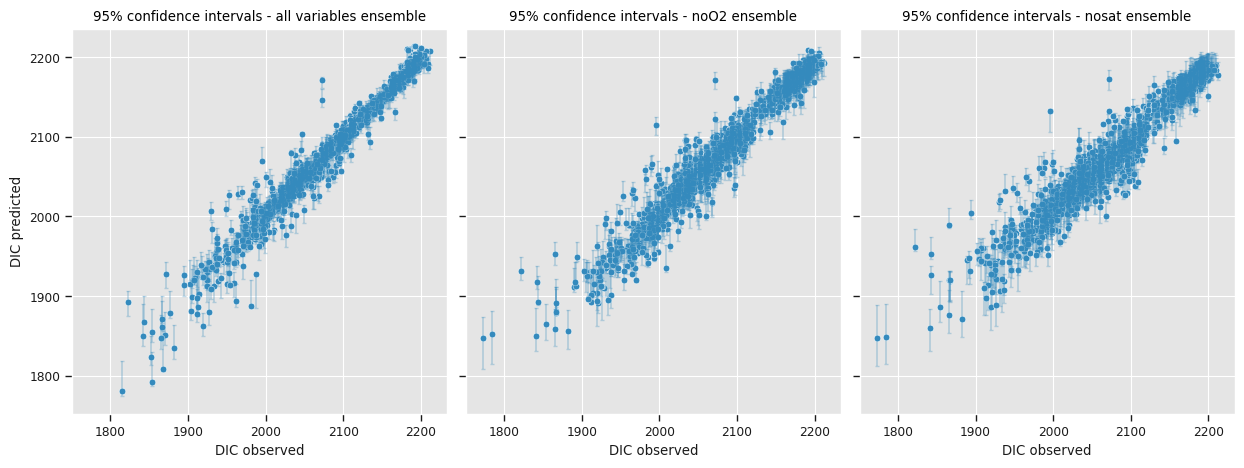

In [4]:
df_test1 = pd.read_csv('results/bottle_data_test_dic_all_vars.csv', index_col=0)
df_ensemble1 = pd.read_csv('results/ensemble_preds_dic_all_vars.csv', index_col=0)
df_ci_ens1 = get_errors(df_ensemble1, df_test1['DIC predicted'])

df_test2 = pd.read_csv('results/bottle_data_test_dic_noO2.csv', index_col=0)
df_ensemble2 = pd.read_csv('results/ensemble_preds_dic_noO2.csv', index_col=0)
df_ci_ens2 = get_errors(df_ensemble2, df_test2['DIC predicted'])

df_test3 = pd.read_csv('results/bottle_data_test_dic_nosat.csv', index_col=0)
df_ensemble3 = pd.read_csv('results/ensemble_preds_dic_nosat.csv', index_col=0)
df_ci_ens3 = get_errors(df_ensemble3, df_test3['DIC predicted'])

# g = sns.relplot(x='DIC observed', y='DIC predicted', data=df_test1)
# _ = g.ax.errorbar(df_test1['DIC observed'], df_test1['DIC predicted'], linestyle='', capsize=1.5,
#                   yerr=df_ci_ens1[['lower_error','upper_error']].transpose().values, alpha=0.3)
# _ = g.ax.set_title('95% confidence intervals from ensemble')

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
fig.subplots_adjust(wspace=0.05)
for ax, df_test, df_ci in zip(axs, [df_test1, df_test2, df_test3], [df_ci_ens1, df_ci_ens2, df_ci_ens3]):
    _ = sns.scatterplot(x='DIC observed', y='DIC predicted', data=df_test, ax=ax)
    _ = ax.errorbar(df_test['DIC observed'], df_test['DIC predicted'], linestyle='', capsize=1.5,
                    yerr=df_ci[['lower_error','upper_error']].transpose().values, alpha=0.3)

_ = axs[0].set_title('95% confidence intervals - all variables ensemble')
_ = axs[1].set_title('95% confidence intervals - noO2 ensemble')
_ = axs[2].set_title('95% confidence intervals - nosat ensemble')

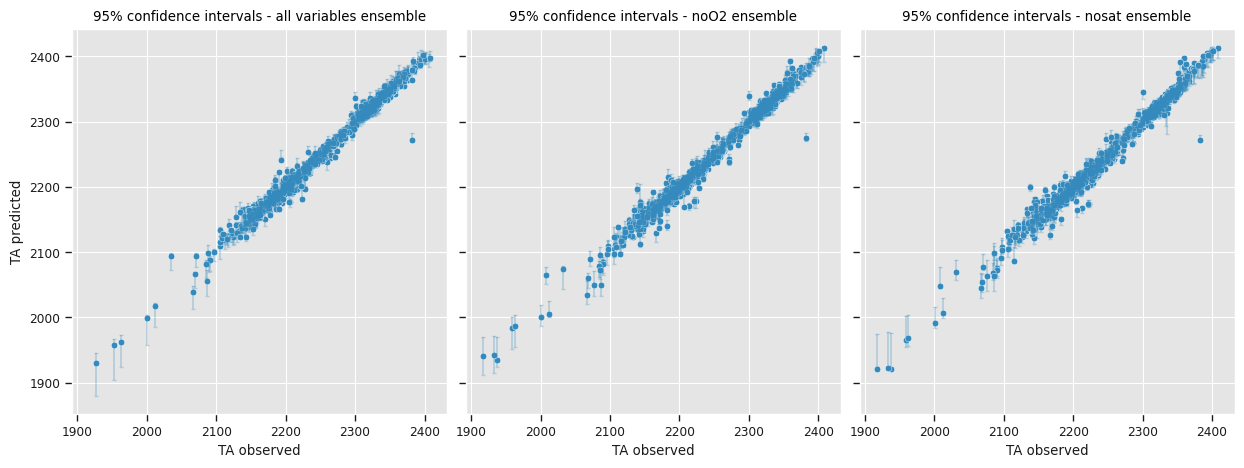

In [5]:
df_test1 = pd.read_csv('results/bottle_data_test_ta_all_vars.csv', index_col=0)
df_ensemble1 = pd.read_csv('results/ensemble_preds_ta_all_vars.csv', index_col=0)
df_ci_ens1 = get_errors(df_ensemble1, df_test1['TA predicted'], drop_col_name='TA_observed')

df_test2 = pd.read_csv('results/bottle_data_test_ta_noO2.csv', index_col=0)
df_ensemble2 = pd.read_csv('results/ensemble_preds_ta_noO2.csv', index_col=0)
df_ci_ens2 = get_errors(df_ensemble2, df_test2['TA predicted'], drop_col_name='TA_observed')

df_test3 = pd.read_csv('results/bottle_data_test_ta_nosat.csv', index_col=0)
df_ensemble3 = pd.read_csv('results/ensemble_preds_ta_nosat.csv', index_col=0)
df_ci_ens3 = get_errors(df_ensemble3, df_test3['TA predicted'], drop_col_name='TA_observed')

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
fig.subplots_adjust(wspace=0.05)
for ax, df_test, df_ci in zip(axs, [df_test1, df_test2, df_test3], [df_ci_ens1, df_ci_ens2, df_ci_ens3]):
    _ = sns.scatterplot(x='TA observed', y='TA predicted', data=df_test, ax=ax)
    _ = ax.errorbar(df_test['TA observed'], df_test['TA predicted'], linestyle='', capsize=1.5,
                    yerr=df_ci[['lower_error','upper_error']].transpose().values, alpha=0.3)

_ = axs[0].set_title('95% confidence intervals - all variables ensemble')
_ = axs[1].set_title('95% confidence intervals - noO2 ensemble')
_ = axs[2].set_title('95% confidence intervals - nosat ensemble')

## Confidence intervals from CV+

In [5]:
def get_errors_cvplus(df_in, prediction):
    df_in['lower_error'] = prediction - df_in.lower_bound
    df_in['upper_error'] = df_in.upper_bound - prediction
    return df_in

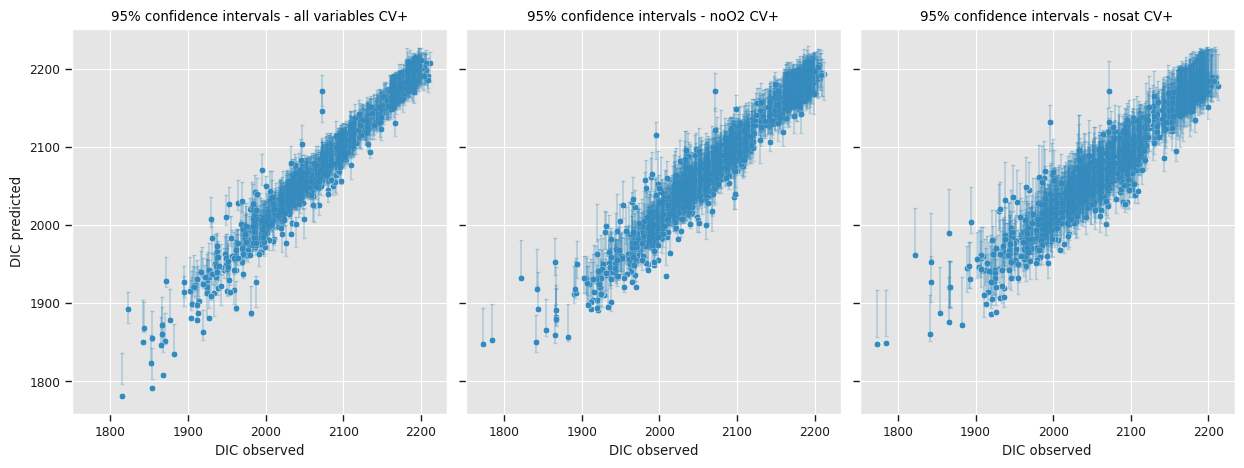

In [6]:
df_test1 = pd.read_csv('results/bottle_data_test_dic_all_vars.csv', index_col=0)
df_ci1 = pd.read_csv('results/ci095_all_vars.csv', index_col=0)
df_ci1 = get_errors_cvplus(df_ci1, df_test1['DIC predicted'])

df_test2 = pd.read_csv('results/bottle_data_test_dic_noO2.csv', index_col=0)
df_ci2 = pd.read_csv('results/ci095_noO2.csv', index_col=0)
df_ci2 = get_errors_cvplus(df_ci2, df_test2['DIC predicted'])

df_test3 = pd.read_csv('results/bottle_data_test_dic_nosat.csv', index_col=0)
df_ci3 = pd.read_csv('results/ci095_nosat.csv', index_col=0)
df_ci3 = get_errors_cvplus(df_ci3, df_test3['DIC predicted'])

# g = sns.relplot(x='DIC observed', y='DIC predicted', data=df_test)
# _ = g.ax.errorbar(df_test['DIC observed'], df_test['DIC predicted'], linestyle='', capsize=1.5,
#                   yerr=df_ci[['lower_error','upper_error']].transpose().values, alpha=0.25)
# _ = g.ax.set_title('95% confidence intervals from CV+')

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
fig.subplots_adjust(wspace=0.05)
for ax, df_test, df_ci in zip(axs, [df_test1, df_test2, df_test3], [df_ci1, df_ci2, df_ci3]):
    _ = sns.scatterplot(x='DIC observed', y='DIC predicted', data=df_test, ax=ax)
    _ = ax.errorbar(df_test['DIC observed'], df_test['DIC predicted'], linestyle='', capsize=1.5,
                    yerr=df_ci[['lower_error','upper_error']].transpose().values, alpha=0.3)

_ = axs[0].set_title('95% confidence intervals - all variables CV+')
_ = axs[1].set_title('95% confidence intervals - noO2 CV+')
_ = axs[2].set_title('95% confidence intervals - nosat CV+')

In [7]:
# ensemble_preds = df_ensemble1.drop('DIC_observed', axis=1).values
# g = sns.displot(x=ensemble_preds[-1])